In [16]:
# %load stock_in_minut.py
import os
import sys
import numpy as np
import pandas as pd
import datetime
#from numpy._distributor_init import NUMPY_MKL
from sklearn.cluster import KMeans
market='shenzhen'
from load_path import *
from package1.download_data.download_daily_price_volume_v2 import *
from package1.path import *

In [17]:
stock_path=os.path.join(stock_index_path,market)
sto2=os.listdir(stock_path)
#print sto2
date1="2017-08-10"
stk_num=sto2[0][0:6]
data_file="g:/stock/data/daily_price_volume/shenzhen/%s/%s_%s.csv" % (stk_num,stk_num,date1)
#print data_file

def data_in_minut(data_file,div_mint):
    data1=pd.read_csv(data_file)
    data2 = data1.iloc[::-1] ## remove the last may have 9:25
    data2.columns=['time','price','volume','status']
    time1=data2.time
    a1=pd.to_datetime(time1,format='%H:%M:%S')
    data2.is_copy=False
    data2.loc[:,'hour']=pd.Series(a1.dt.hour,index=data2.index)
    #data2.loc[:,'minute']=pd.Series(a1.dt.minute,index=data2.index)
    data2.loc[:,'minute']=pd.Series(a1.dt.minute.values/div_mint*div_mint,index=data2.index)
    #print data2
    data2=data2.drop(data2[(data2.minute<26)&(data2.hour==9)].index)
    ave_minut1=data2[['price','hour','minute']].groupby(['hour','minute']).mean()
    #print ave_minut1
    return ave_minut1


In [146]:
a2=[]
stock_in=[]
len1=[]
#a4=pd.DataFrame()
#print a4
for i in sto2:
    stk_num=i[0:6]
    data_file="g:/stock/data/daily_price_volume/shenzhen/%s/%s_%s.csv" % (stk_num,stk_num,date1)
    #print data_file
    try:
        a1=data_in_minut(data_file,3)
        a3=a1.values.T.tolist()
        a2.append(a3[0])
        stock_in.append(stk_num)
        len1.append(len(a1))
    except:
        print 'fuck'

from collections import Counter
cnt=Counter(len1)  # count the most common elements
most_common=cnt.most_common(1)[0][0]
#print most_co
matches = zip(*[(i,j) for (i,j) in enumerate(len1) if j ==most_common])
#print matches
#print a2[0]

'''
stk_num="002857"
data_file="g:/stock/data/daily_price_volume/shenzhen/%s/%s_%s.csv" % (stk_num,stk_num,date1)
a1=data_in_minut(data_file,3)
print a1
a3=a1.values.T.tolist()
print(len(a3[0]))
print type(a3)
'''

fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck
fuck


'\nstk_num="002857"\ndata_file="g:/stock/data/daily_price_volume/shenzhen/%s/%s_%s.csv" % (stk_num,stk_num,date1)\na1=data_in_minut(data_file,3)\nprint a1\na3=a1.values.T.tolist()\nprint(len(a3[0]))\nprint type(a3)\n'

<type 'numpy.ndarray'>
Counter({12: 179, 19: 164, 10: 150, 3: 112, 13: 98, 1: 83, 0: 77, 4: 59, 17: 53, 2: 37, 7: 30, 15: 29, 16: 24, 6: 22, 5: 14, 8: 5, 14: 4, 11: 2, 18: 2, 9: 1})


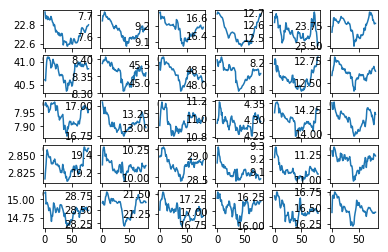

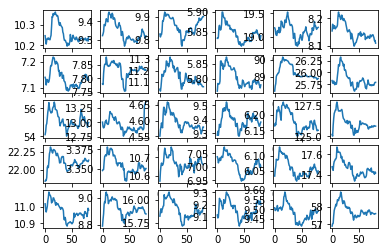

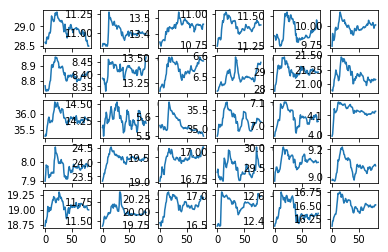

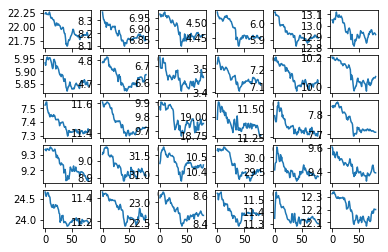

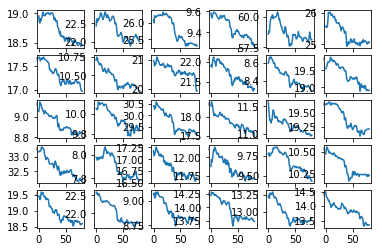

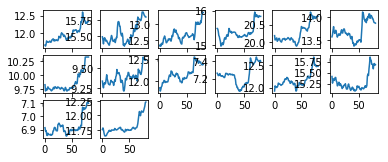

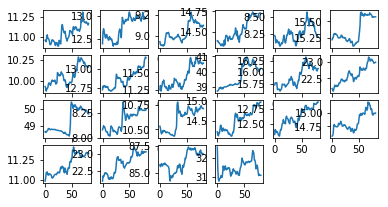

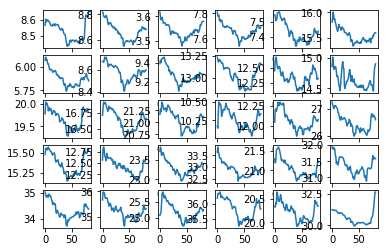

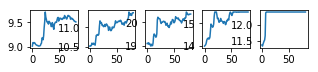

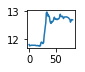

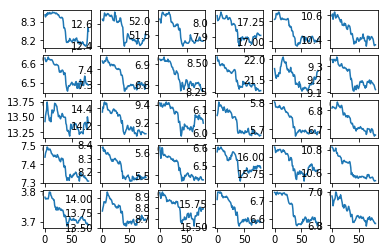

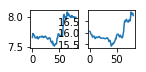

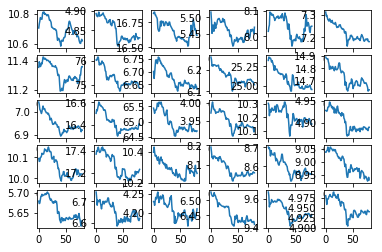

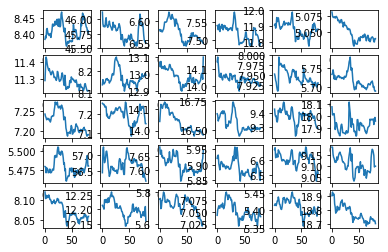

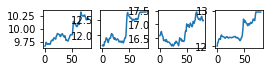

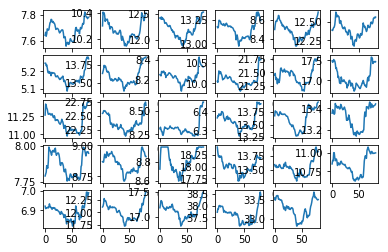

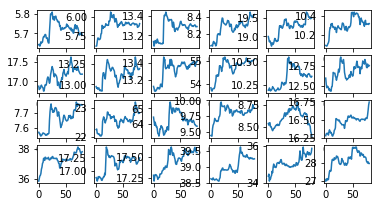

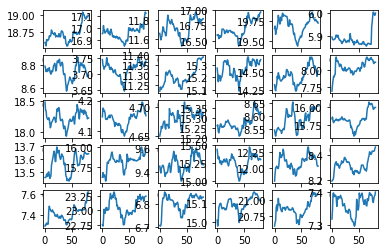

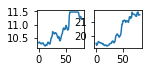

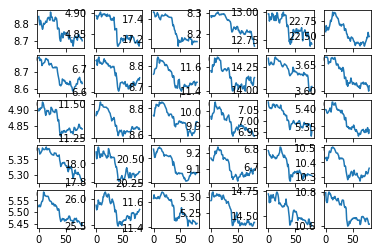

'\nf, axarr = plt.subplots(2, 2)\naxarr[0, 0].plot(xrange(0,82),x1[21])\naxarr[0, 1].plot(xrange(0,82),x1[18])\naxarr[1,0].plot(xrange(0,82),x1[32])\n# plt.scatter(xrange(0,82),x1[21])\n# plt.show()\nplt.show()\n'

In [147]:
import matplotlib.pyplot as plt
### cluster analysis
match1=matches[0]
x=[]
s2=[]
for m1 in match1:
    x.append((a2[m1]-np.mean(a2[m1]))/np.mean(a2[m1]))
    s2.append(a2[m1])
x1=np.array(x)
#print x1
print type(x1)
cluster_num=20
kmeans_model = KMeans(n_clusters=cluster_num, random_state=1).fit(x1)
labels = kmeans_model.labels_
cnt=Counter(labels)
print cnt
#print labels
for lab1 in range(0,cluster_num):
    n1=np.where(labels==lab1)[0]
    #print np.where(labels==1)
    len_n1=len(n1)
    # print n1
    # print len(n1)
    fig=plt.figure()
    for idx in xrange(len_n1):
        #plt.figure(2,2)
        if idx<30:
            ax=fig.add_subplot(5,6, idx+1)
            nn1=n1[idx]
            plt.plot(xrange(0,82),s2[nn1])

    plt.show()


'''
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(xrange(0,82),x1[21])
axarr[0, 1].plot(xrange(0,82),x1[18])
axarr[1,0].plot(xrange(0,82),x1[32])
# plt.scatter(xrange(0,82),x1[21])
# plt.show()
plt.show()
'''

In [142]:
len_n1

45

In [13]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target
import numpy as np
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
kmeans_model
labels = kmeans_model.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [11]:
ddX

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4